## Intial data stab...


## Visualizations

* Line graph with two lines, one for total ethanol consumed (sum) over time and another for average mortallity over time for one state and beverage type
* Heat map, average mortality rate by state
* Heat map, alcohol consumption by state
* Statistics, death type with the most correlation (alocohol consumption vs mortality rate)
* Outliers by state (gallons of ethanol for stat) *** Is there a way to identify which outliers are which states
* Correlations over years for mortality rate and ethanol consumption (Explore: All Beverages vs Different Beverage Types)

#### [mentalvascular, Cirrhosis, Mental_substance abuse, Neurological]


In [1]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
#create a dataframe from each excel sheet.

filepath = "Data Files/Cleaned Files/Copy of mort_cleaned.xlsx"

xls = pd.ExcelFile(filepath)
df_HIV_AIDS_tuberculosis = pd.read_excel(xls, 'HIV-AIDS & tuberculosis')
df_Diarrhea_lower_respiratory = pd.read_excel(xls,'Diarrhea, lower respiratory')
df_Neglected_tropical_diseases = pd.read_excel(xls,'Neglected tropical diseases')
df_Maternal_disorders = pd.read_excel(xls,'Maternal disorders')
df_Neonatal_disorders = pd.read_excel(xls,'Neonatal disorders')
df_Nutritional_deficiencies = pd.read_excel(xls, 'Nutritional deficiencies')
df_Other_communicable_maternal  = pd.read_excel(xls,'Other communicable_maternal')
df_Neoplasms = pd.read_excel(xls,'Neoplasms')
df_Cardiovascular_diseases = pd.read_excel(xls,'Cardiovascular diseases')
df_Chronic_respiratory_diseases = pd.read_excel(xls,'Chronic respiratory diseases')
df_Cirrhosis_other_chronic  = pd.read_excel(xls,'Cirrhosis & other chronic ')
df_Digestive_diseases = pd.read_excel(xls, 'Digestive diseases')
df_Neurological_disorders  = pd.read_excel(xls,'Neurological disorders')
df_Mental_substance_use  = pd.read_excel(xls,'Mental & substance use ')
df_Diabetes_urogenital_blood = pd.read_excel(xls,'Diabetes_urogenital_blood')
df_Musculoskeletal_disorders = pd.read_excel(xls,'Musculoskeletal disorders')
df_Other_non_communicable   = pd.read_excel(xls,'Other non-communicable ')
df_Transport_injuries = pd.read_excel(xls, 'Transport injuries')
df_Unintentional_injuries  = pd.read_excel(xls,'Unintentional injuries')
df_Self_harm_interpersonal   = pd.read_excel(xls,'Self-harm & interpersonal ')
df_Forces_of_nature_war_legal  = pd.read_excel(xls,'Forces of nature, war, & legal ')








In [3]:
#df_Forces_of_nature_war_legal.iloc[:,3].head
#df_Forces_of_nature_war_legal.rename(columns={"Mortality Rate, 1980*": "Mortality Rate"}, inplace = True)
#df_Forces_of_nature_war_legal.rename(columns = {df_Forces_of_nature_war_legal.columns[3]: 'col_1_new_name'}, inplace = True)
df_Mental_substance_use.head()

Location    FIPS Mortality Rate, 1980*  \
0            United States     NaN     4.64 (4.42, 4.95)   
1                  Alabama     1.0     3.85 (3.53, 4.23)   
2  Autauga County, Alabama  1001.0     3.72 (2.65, 5.19)   
3  Baldwin County, Alabama  1003.0     3.43 (2.51, 4.53)   
4  Barbour County, Alabama  1005.0     4.67 (3.39, 6.42)   

  Mortality Rate, 1985* Mortality Rate, 1990* Mortality Rate, 1995*  \
0     4.83 (4.68, 5.17)     5.29 (5.14, 5.50)     6.20 (6.01, 6.40)   
1     4.06 (3.78, 4.44)     4.55 (4.29, 4.85)     5.22 (4.91, 5.52)   
2     3.62 (2.67, 4.88)     4.09 (3.06, 5.45)     4.16 (3.19, 5.34)   
3     3.78 (2.94, 4.81)     4.84 (3.75, 6.00)     5.16 (4.11, 6.38)   
4     3.98 (2.93, 5.31)     4.11 (3.05, 5.48)     4.63 (3.41, 6.19)   

  Mortality Rate, 2000* Mortality Rate, 2005* Mortality Rate, 2010*  \
0     7.84 (7.61, 8.09)  10.83 (10.52, 11.14)  12.66 (12.24, 13.04)   
1     6.72 (6.39, 7.09)    9.77 (9.33, 10.21)  12.34 (11.76, 12.89)   
2     5.03 (3.90, 6.43)     7.28 (5.75, 9.07)    8.44 (6.61, 10.53)   
3     7.20 (5.92, 8.72)  12.04 (10.30, 14.02)  14.78 (12.70, 16.96)   
4     5.38 (4.05, 6.89)     7.18 (5.45, 9.23)    8.03 (6.07, 10.47)   

  Mortality Rate, 2014* % Change in Mortality Rate, 1980-2014  
0  13.39 (12.73, 13.92)               188.39 (160.01, 207.11)  
1  14.33 (13.53, 15.03)               272.34 (229.73, 311.29)  
2    8.93 (6.84, 11.19)                140.26 (57.82, 255.56)  
3  15.98 (14.04, 18.02)               365.53 (238.43, 555.36)  
4    8.28 (6.05, 10.99)                 77.09 (17.26, 166.97)

In [7]:
dfs = {0:df_HIV_AIDS_tuberculosis, 1:df_Diarrhea_lower_respiratory,
      2:df_Neglected_tropical_diseases,3:df_Maternal_disorders,4:df_Neonatal_disorders,
      5:df_Nutritional_deficiencies,6:df_Other_communicable_maternal,7:df_Neoplasms,
      8:df_Cardiovascular_diseases,9:df_Chronic_respiratory_diseases,10:df_Cirrhosis_other_chronic,
      11:df_Digestive_diseases,12:df_Neurological_disorders,13:df_Mental_substance_use,
      14:df_Diabetes_urogenital_blood,15:df_Musculoskeletal_disorders, 16:df_Other_non_communicable,
      17:df_Transport_injuries,18:df_Unintentional_injuries, 19:df_Self_harm_interpersonal,
      20:df_Forces_of_nature_war_legal}

list = [i for i in range(21)]
list_of_df = {0:'HIV_AIDS_tuberculosis',1:'Diarrhea_lower_respiratory',2:'Neglected_tropical_diseases',
             3:'Maternal_disorders',4:'Neonatal_disorders',5:'Nutritional_deficiencies',6:'Other_communicable_maternal',
             7:'Neoplasms',8:'Cardiovascular_diseases',9:'Chronic_respiratory_diseases',
             10:'Cirrhosis_other_chronic',11:'Digestive_diseases',12:'Neurological_disorders',
              13:'Mental_substance_use',14:'Diabetes_urogenital_blood',15:'Musculoskeletal_diorders',
             16:'Other_non_communicable',17:'Transport_injuries',18:'Unintentional_injuries',
             19:'Self_harm_interpersonal',20:'Forces_of_nature_war_legal'}


#Dictionary of Mortality df created 0- 20


In [8]:
filepath2 = "Data Files/Cleaned Files/NIH Data Alcohol Consumption.csv"
filepath3 = "Data Files/Cleaned Files/NIH Data FIPS.csv"
filepath4 = "Data Files/Cleaned Files/NIH Beverage Codes.csv"

df_nih = pd.read_csv(filepath2)
df_beverage_codes = pd.read_csv(filepath4)
df_fips_codes = pd.read_csv(filepath3)

df_nih['Gallons of ethanol per capita age 21 and older'] = df_nih['Gallons of ethanol per capita age 21 and older']/10000


In [9]:
df_nih.head()

Year  FIPS  Type of beverage Gallons of beverage  Gallons of ethanol  \
0  1970     1                 1             3863000             1738350   
1  1970     1                 2             1412000              225920   
2  1970     1                 3            33098000             1489410   
3  1970     1                 4                   .             3453680   
4  1970     2                 1              945000              425250   

   Population (14 and older)  Gallons of ethanol per capita age 14 and older  \
0                    2499000                                            6956   
1                    2499000                                             904   
2                    2499000                                            5960   
3                    2499000                                           13820   
4                     205000                                           20744   

   Decile for per capita consumption age 14 and older  \
0                                                9.0    
1                                                9.0    
2                                               10.0    
3                                               10.0    
4                                                1.0    

   Population (21 and older)  Gallons of ethanol per capita age 21 and older  \
0                    2020000                                          0.8606   
1                    2020000                                          0.1118   
2                    2020000                                          0.7373   
3                    2020000                                          1.7097   
4                     165000                                          2.5773   

   Decile for per capita consumption age 21 and older Type of data source  \
0                                                9.0                    .   
1                                                9.0                    .   
2                                               10.0                    .   
3                                               10.0                    .   
4                                                1.0                    .   

  Time-varying alcohol by volume (ABV)  \
0                                    .   
1                                    .   
2                                    .   
3                                    .   
4                                    .   

  Gallons of ethanol derived from time-varying ABV  
0                                                .  
1                                                .  
2                                                .  
3                                                .  
4                                                .

In [10]:
df_nih_merged = pd.merge(df_nih, df_beverage_codes, how="left", left_on = 'Type of beverage', right_on = 'Beverage ID')
df_nih_merged = pd.merge(df_nih_merged, df_fips_codes, how="left", left_on = 'FIPS', right_on = 'FIPS')

In [11]:
df_nih_merged.head()

Year  FIPS  Type of beverage Gallons of beverage  Gallons of ethanol  \
0  1970     1                 1             3863000             1738350   
1  1970     1                 2             1412000              225920   
2  1970     1                 3            33098000             1489410   
3  1970     1                 4                   .             3453680   
4  1970     2                 1              945000              425250   

   Population (14 and older)  Gallons of ethanol per capita age 14 and older  \
0                    2499000                                            6956   
1                    2499000                                             904   
2                    2499000                                            5960   
3                    2499000                                           13820   
4                     205000                                           20744   

   Decile for per capita consumption age 14 and older  \
0                                                9.0    
1                                                9.0    
2                                               10.0    
3                                               10.0    
4                                                1.0    

   Population (21 and older)  Gallons of ethanol per capita age 21 and older  \
0                    2020000                                          0.8606   
1                    2020000                                          0.1118   
2                    2020000                                          0.7373   
3                    2020000                                          1.7097   
4                     165000                                          2.5773   

   Decile for per capita consumption age 21 and older Type of data source  \
0                                                9.0                    .   
1                                                9.0                    .   
2                                               10.0                    .   
3                                               10.0                    .   
4                                                1.0                    .   

  Time-varying alcohol by volume (ABV)  \
0                                    .   
1                                    .   
2                                    .   
3                                    .   
4                                    .   

  Gallons of ethanol derived from time-varying ABV  Beverage ID  \
0                                                .            1   
1                                                .            2   
2                                                .            3   
3                                                .            4   
4                                                .            1   

   Beverage Type    State  
0        Spirits  Alabama  
1           Wine  Alabama  
2           Beer  Alabama  
3  All Beverages  Alabama  
4        Spirits   Alaska

In [12]:
# Create subsets for year

nih_1980 = df_nih_merged.loc[(df_nih_merged['Year'] == 1980) & (df_nih_merged['FIPS'] < 60)]
nih_1985 = df_nih_merged.loc[(df_nih_merged['Year'] == 1985) & (df_nih_merged['FIPS'] < 60)]
nih_1990 = df_nih_merged.loc[(df_nih_merged['Year'] == 1990) & (df_nih_merged['FIPS'] < 60)]
nih_1995 = df_nih_merged.loc[(df_nih_merged['Year'] == 1995) & (df_nih_merged['FIPS'] < 60)]
nih_2000 = df_nih_merged.loc[(df_nih_merged['Year'] == 2000) & (df_nih_merged['FIPS'] < 60)]
nih_2005 = df_nih_merged.loc[(df_nih_merged['Year'] == 2005) & (df_nih_merged['FIPS'] < 60)]
nih_2010 = df_nih_merged.loc[(df_nih_merged['Year'] == 2010) & (df_nih_merged['FIPS'] < 60)]
nih_2014 = df_nih_merged.loc[(df_nih_merged['Year'] == 2014) & (df_nih_merged['FIPS'] < 60)]

In [13]:
# Create dictionary of nih yearly dataframes...

nihs = {0:nih_1980,1:nih_1985,2:nih_1990,3:nih_1995,4:nih_2000,5:nih_2005,6:nih_2010,7:nih_2014}
nih_list = [i for i in range(8)]
when_list = [1980,1985,1990,1995,2000,2005,2010,2014]
print(nih_list)

[0, 1, 2, 3, 4, 5, 6, 7]


In [14]:
# Loop throguh mortality dfs and nih dfs all years.
i=0
j=0

when = []
mort_cat = []
cor_coeff = []
p_val =[]

for i in list:
    df_working_mort = pd.DataFrame(dfs[i])


    for j in nih_list:
       # print(f'Year {when_list[j]}  -------------------------{j}')

        df_working_nih = pd.DataFrame(nihs[j])

        df_states_working_mort = df_working_mort.loc[df_working_mort['FIPS']<60]
        nih_working_merged_working_mort = pd.merge(df_working_nih, df_states_working_mort, how = 'left', left_on = 'State', right_on = 'Location' )
        nih_working_merged_working_mort = nih_working_merged_working_mort[
                        ['Year','FIPS_x','Type of beverage', 'Gallons of ethanol per capita age 21 and older',
                         'Mortality Rate, 1980*','Mortality Rate, 1985*','Mortality Rate, 1990*',
                         'Mortality Rate, 1995*','Mortality Rate, 2000*','Mortality Rate, 2005*',
                         'Mortality Rate, 2010*','Mortality Rate, 2014*','Location']]

        nih_working_merged_working_mort.columns.values[j+4] = "Mortality Rate"

        df_working_merged_working_mort = pd.merge(nih_working_merged_working_mort,df_beverage_codes, how='left', left_on ='Type of beverage', right_on = 'Beverage ID')

        working_merged_clean = df_working_merged_working_mort['Mortality Rate'].str.split(' ').str.get(0).astype(float)
        df_working_merged_working_mort['Mortality Rate'] = working_merged_clean

        df_working_merged_working4 = df_working_merged_working_mort.loc[df_working_merged_working_mort['Beverage ID'] == 4]
        df_working_merged_working4.dropna(inplace=True)

        x_values4 = df_working_merged_working4['Gallons of ethanol per capita age 21 and older']
        y_values4 = df_working_merged_working4['Mortality Rate']

        corr4= st.pearsonr(x_values4,y_values4)
        if corr4[1] < 0.05:
           # print(f'the correlation for {list_of_df[i]} in {when_list[j]} is {corr4}')
           # significant_list.append({'Year':when_list[j],'Mortality Category':list_of_df[i],'Correlation Coeff':corr4[0],'P-Value':corr4[1]}, ignore_index=True)
            when.append(when_list[j])
            mort_cat.append(list_of_df[i])
            cor_coeff.append(corr4[0])
            p_val.append(corr4[1])
            
        #nih_working_merged_working_mort.rename(columns = {nih_working_merged_working_mort.columns[j+2]: 'Done'}, inplace = True)

tab = pd.DataFrame({'Year':when,'Mortality Category':mort_cat,'Correlation Coeff':cor_coeff,'P-Value':p_val})
tab_sorted = tab.sort_values(by=['Correlation Coeff'], ascending = False)
tab_sorted
#tab
    
#print(corr4[0],corr4[1])
#df_1980_merged_working4.head()    
#df_working_merged_working4.head()
#df_states_working_mort.head()


C:\Users\Walte\.conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Year            Mortality Category  Correlation Coeff   P-Value
21  1985       Cirrhosis_other_chronic           0.556331  0.000033
20  1980       Cirrhosis_other_chronic           0.511770  0.000171
22  1990       Cirrhosis_other_chronic           0.506808  0.000202
29  1990          Mental_substance_use           0.500127  0.000253
28  1985          Mental_substance_use           0.487136  0.000386
23  1995       Cirrhosis_other_chronic           0.428749  0.002114
30  1995          Mental_substance_use           0.397301  0.004703
18  1980  Chronic_respiratory_diseases           0.395368  0.004928
27  1980          Mental_substance_use           0.378977  0.007246
24  2000       Cirrhosis_other_chronic           0.360974  0.010830
31  2000          Mental_substance_use           0.339065  0.017160
42  1995       Self_harm_interpersonal           0.297766  0.037714
26  1980        Neurological_disorders           0.296584  0.038518
19  1985  Chronic_respiratory_diseases           0.293776  0.040482
12  1985       Cardiovascular_diseases          -0.282207  0.049462
1   2000    Diarrhea_lower_respiratory          -0.291135  0.042404
40  2010        Other_non_communicable          -0.291163  0.042384
38  1990      Musculoskeletal_diorders          -0.298942  0.036929
13  1995       Cardiovascular_diseases          -0.301337  0.035371
8   2014            Neonatal_disorders          -0.304161  0.033604
11  1980       Cardiovascular_diseases          -0.307360  0.031691
9   2010      Nutritional_deficiencies          -0.313112  0.028480
6   2010            Maternal_disorders          -0.320783  0.024623
25  2005            Digestive_diseases          -0.321164  0.024443
37  1985      Musculoskeletal_diorders          -0.322062  0.024025
39  2005        Other_non_communicable          -0.322775  0.023696
41  2014        Other_non_communicable          -0.324653  0.022850
7   2014            Maternal_disorders          -0.324690  0.022833
10  2014      Nutritional_deficiencies          -0.327914  0.021440
32  2000     Diabetes_urogenital_blood          -0.335690  0.018371
0   1995    Diarrhea_lower_respiratory          -0.345177  0.015139
36  1980      Musculoskeletal_diorders          -0.353420  0.012737
5   2005            Maternal_disorders          -0.356539  0.011917
2   2005    Diarrhea_lower_respiratory          -0.359588  0.011160
14  2000       Cardiovascular_diseases          -0.373649  0.008180
15  2005       Cardiovascular_diseases          -0.403221  0.004069
3   2010    Diarrhea_lower_respiratory          -0.408070  0.003607
16  2010       Cardiovascular_diseases          -0.433284  0.001872
33  2005     Diabetes_urogenital_blood          -0.438620  0.001619
4   2014    Diarrhea_lower_respiratory          -0.451545  0.001127
17  2014       Cardiovascular_diseases          -0.458175  0.000931
34  2010     Diabetes_urogenital_blood          -0.485272  0.000409
35  2014     Diabetes_urogenital_blood          -0.509997  0.000182

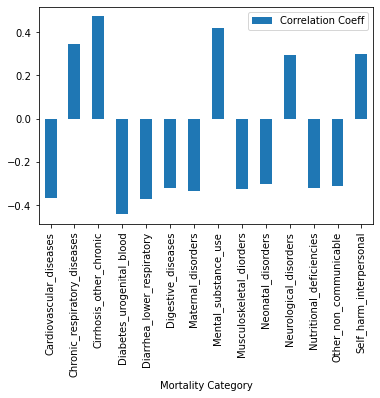

In [15]:
Mort_cat_groups_mean = tab.groupby(['Mortality Category']).mean()
Mort_cat_groups_mean.plot(kind = 'bar',y='Correlation Coeff')

In [16]:
# Get States Data from Substance Abuse DataFrame
#df_states_mental_substance_use = df_Mental_substance_use.loc[df_Mental_substance_use['FIPS'] < 60]
df_Mental_substance_use = df_Mental_substance_use.loc[df_Mental_substance_use['FIPS'] < 60]

In [17]:
df_Mental_substance_use.head()

Location  FIPS Mortality Rate, 1980* Mortality Rate, 1985*  \
1       Alabama   1.0     3.85 (3.53, 4.23)     4.06 (3.78, 4.44)   
69       Alaska   2.0  12.45 (11.02, 14.16)   10.96 (9.79, 12.37)   
99      Arizona   4.0     6.80 (6.16, 7.51)     6.98 (6.48, 7.57)   
115    Arkansas   5.0     2.36 (2.14, 2.61)     2.46 (2.28, 2.70)   
191  California   6.0     6.48 (6.12, 6.91)     7.64 (7.32, 8.09)   

    Mortality Rate, 1990* Mortality Rate, 1995* Mortality Rate, 2000*  \
1       4.55 (4.29, 4.85)     5.22 (4.91, 5.52)     6.72 (6.39, 7.09)   
69   12.04 (10.84, 13.42)  12.74 (11.61, 14.05)  16.04 (14.76, 17.52)   
99      7.87 (7.32, 8.45)    9.56 (9.03, 10.12)  11.83 (11.28, 12.44)   
115     3.00 (2.81, 3.23)     3.71 (3.49, 3.97)     4.92 (4.66, 5.20)   
191     7.51 (7.24, 7.85)     8.32 (8.04, 8.63)     8.78 (8.48, 9.08)   

    Mortality Rate, 2005* Mortality Rate, 2010* Mortality Rate, 2014*  \
1      9.77 (9.33, 10.21)  12.34 (11.76, 12.89)  14.33 (13.53, 15.03)   
69   20.08 (18.65, 21.58)  20.92 (19.41, 22.55)  21.98 (20.38, 23.71)   
99   14.66 (14.05, 15.28)  17.72 (17.07, 18.44)  17.17 (16.34, 17.90)   
115     7.82 (7.45, 8.21)   10.15 (9.66, 10.71)  10.99 (10.34, 11.62)   
191  11.39 (11.05, 11.76)  11.72 (11.30, 12.12)  11.35 (10.73, 11.82)   

    % Change in Mortality Rate, 1980-2014  
1                 272.34 (229.73, 311.29)  
69                  76.49 (50.92, 102.50)  
99                152.36 (122.26, 180.55)  
115               366.61 (312.10, 422.14)  
191                  75.26 (58.86, 87.50)

In [18]:
# Create new dataframe for cirrhosis for each year

nih_1980_merged_mental = pd.merge(nih_1980, df_Mental_substance_use, how = 'left', left_on = 'State', right_on = 'Location' )
nih_1985_merged_mental = pd.merge(nih_1985, df_Mental_substance_use, how = 'left', left_on = 'State', right_on = 'Location' )
nih_1990_merged_mental = pd.merge(nih_1990, df_Mental_substance_use, how = 'left', left_on = 'State', right_on = 'Location' )
nih_1995_merged_mental = pd.merge(nih_1995, df_Mental_substance_use, how = 'left', left_on = 'State', right_on = 'Location' )
nih_2000_merged_mental = pd.merge(nih_2000, df_Mental_substance_use, how = 'left', left_on = 'State', right_on = 'Location' )
nih_2005_merged_mental = pd.merge(nih_2005, df_Mental_substance_use, how = 'left', left_on = 'State', right_on = 'Location' )
nih_2010_merged_mental = pd.merge(nih_2010, df_Mental_substance_use, how = 'left', left_on = 'State', right_on = 'Location' )
nih_2014_merged_mental = pd.merge(nih_2014, df_Mental_substance_use, how = 'left', left_on = 'State', right_on = 'Location' )

In [19]:
# Grab only needed columns (don't forget to change year number in Mortality Rate column)
nih_1980_merged_mental = nih_1980_merged_mental[['Year','FIPS_x','Type of beverage', 'Gallons of ethanol per capita age 21 and older','Mortality Rate, 1980*','Location']]
nih_1985_merged_mental = nih_1985_merged_mental[['Year','FIPS_x','Type of beverage', 'Gallons of ethanol per capita age 21 and older','Mortality Rate, 1985*','Location']]
nih_1990_merged_mental = nih_1990_merged_mental[['Year','FIPS_x','Type of beverage', 'Gallons of ethanol per capita age 21 and older','Mortality Rate, 1990*','Location']]
nih_1995_merged_mental = nih_1995_merged_mental[['Year','FIPS_x','Type of beverage', 'Gallons of ethanol per capita age 21 and older','Mortality Rate, 1995*','Location']]
nih_2000_merged_mental = nih_2000_merged_mental[['Year','FIPS_x','Type of beverage', 'Gallons of ethanol per capita age 21 and older','Mortality Rate, 2000*','Location']]
nih_2005_merged_mental = nih_2005_merged_mental[['Year','FIPS_x','Type of beverage', 'Gallons of ethanol per capita age 21 and older','Mortality Rate, 2005*','Location']]
nih_2010_merged_mental = nih_2010_merged_mental[['Year','FIPS_x','Type of beverage', 'Gallons of ethanol per capita age 21 and older','Mortality Rate, 2010*','Location']]
nih_2014_merged_mental = nih_2014_merged_mental[['Year','FIPS_x','Type of beverage', 'Gallons of ethanol per capita age 21 and older','Mortality Rate, 2014*','Location']]

In [20]:
# Rename Mortality Rate column
nih_1980_merged_mental.rename(columns={"Mortality Rate, 1980*": "Mortality Rate"}, inplace = True)
nih_1985_merged_mental.rename(columns={"Mortality Rate, 1985*": "Mortality Rate"}, inplace = True)
nih_1990_merged_mental.rename(columns={"Mortality Rate, 1990*": "Mortality Rate"}, inplace = True)
nih_1995_merged_mental.rename(columns={"Mortality Rate, 1995*": "Mortality Rate"}, inplace = True)
nih_2000_merged_mental.rename(columns={"Mortality Rate, 2000*": "Mortality Rate"}, inplace = True)
nih_2005_merged_mental.rename(columns={"Mortality Rate, 2005*": "Mortality Rate"}, inplace = True)
nih_2010_merged_mental.rename(columns={"Mortality Rate, 2010*": "Mortality Rate"}, inplace = True)
nih_2014_merged_mental.rename(columns={"Mortality Rate, 2014*": "Mortality Rate"}, inplace = True)

In [21]:

# Concatenate all year dataframes
frames_mental = [nih_1980_merged_mental, 
                    nih_1985_merged_mental,
                    nih_1990_merged_mental,
                    nih_1995_merged_mental,
                    nih_2000_merged_mental,
                    nih_2005_merged_mental,
                    nih_2010_merged_mental,
                    nih_2014_merged_mental]

df_concat_mental = pd.concat(frames_mental)

df_concat_mental

Year  FIPS_x  Type of beverage  \
0    1980       1                 1   
1    1980       1                 2   
2    1980       1                 3   
3    1980       1                 4   
4    1980       2                 1   
..    ...     ...               ...   
199  2014      55                 4   
200  2014      56                 1   
201  2014      56                 2   
202  2014      56                 3   
203  2014      56                 4   

     Gallons of ethanol per capita age 21 and older        Mortality Rate  \
0                                            0.8959     3.85 (3.53, 4.23)   
1                                            0.1960     3.85 (3.53, 4.23)   
2                                            1.1504     3.85 (3.53, 4.23)   
3                                            2.2423     3.85 (3.53, 4.23)   
4                                            2.0345  12.45 (11.02, 14.16)   
..                                              ...                   ...   
199                                          3.3634  12.67 (12.03, 13.26)   
200                                          1.3061  16.21 (15.08, 17.43)   
201                                          0.3460  16.21 (15.08, 17.43)   
202                                          1.4129  16.21 (15.08, 17.43)   
203                                          3.0649  16.21 (15.08, 17.43)   

      Location  
0      Alabama  
1      Alabama  
2      Alabama  
3      Alabama  
4       Alaska  
..         ...  
199  Wisconsin  
200    Wyoming  
201    Wyoming  
202    Wyoming  
203    Wyoming  

[1632 rows x 6 columns]

In [22]:
df_concat_mental = pd.merge(df_concat_mental,df_beverage_codes, how='left', left_on ='Type of beverage', right_on = 'Beverage ID')

In [23]:
df_concat_mental_clean = df_concat_mental['Mortality Rate'].str.split(' ').str.get(0).astype(float)

In [24]:
df_concat_mental['Mortality Rate'] = df_concat_mental_clean

In [25]:
df_concat_mental

Year  FIPS_x  Type of beverage  \
0     1980       1                 1   
1     1980       1                 2   
2     1980       1                 3   
3     1980       1                 4   
4     1980       2                 1   
...    ...     ...               ...   
1627  2014      55                 4   
1628  2014      56                 1   
1629  2014      56                 2   
1630  2014      56                 3   
1631  2014      56                 4   

      Gallons of ethanol per capita age 21 and older  Mortality Rate  \
0                                             0.8959            3.85   
1                                             0.1960            3.85   
2                                             1.1504            3.85   
3                                             2.2423            3.85   
4                                             2.0345           12.45   
...                                              ...             ...   
1627                                          3.3634           12.67   
1628                                          1.3061           16.21   
1629                                          0.3460           16.21   
1630                                          1.4129           16.21   
1631                                          3.0649           16.21   

       Location  Beverage ID  Beverage Type  
0       Alabama            1        Spirits  
1       Alabama            2           Wine  
2       Alabama            3           Beer  
3       Alabama            4  All Beverages  
4        Alaska            1        Spirits  
...         ...          ...            ...  
1627  Wisconsin            4  All Beverages  
1628    Wyoming            1        Spirits  
1629    Wyoming            2           Wine  
1630    Wyoming            3           Beer  
1631    Wyoming            4  All Beverages  

[1632 rows x 8 columns]

In [26]:
# Isolate rows for all beverages
df_concat_mental4 = df_concat_mental.loc[df_concat_mental['Beverage ID'] == 4]
df_concat_mental1 = df_concat_mental.loc[df_concat_mental['Beverage ID'] == 1]
df_concat_mental2 = df_concat_mental.loc[df_concat_mental['Beverage ID'] == 2]
df_concat_mental3 = df_concat_mental.loc[df_concat_mental['Beverage ID'] == 3]


In [27]:
df_concat_mental4.describe()

Year      FIPS_x  Type of beverage  \
count   408.00000  408.000000             408.0   
mean   1997.37500   28.960784               4.0   
std      11.28257   15.696083               0.0   
min    1980.00000    1.000000               4.0   
25%    1988.75000   16.000000               4.0   
50%    1997.50000   29.000000               4.0   
75%    2006.25000   42.000000               4.0   
max    2014.00000   56.000000               4.0   

       Gallons of ethanol per capita age 21 and older  Mortality Rate  \
count                                      408.000000      392.000000   
mean                                         2.849246        8.320204   
std                                          0.729356        4.708104   
min                                          1.473000        1.810000   
25%                                          2.393375        4.525000   
50%                                          2.694700        7.140000   
75%                                          3.115325       11.352500   
max                                          6.772300       27.110000   

       Beverage ID  
count        408.0  
mean           4.0  
std            0.0  
min            4.0  
25%            4.0  
50%            4.0  
75%            4.0  
max            4.0

In [28]:
# Remove nulls

df_concat_mental4.dropna(inplace=True)
df_concat_mental1.dropna(inplace=True)
df_concat_mental2.dropna(inplace=True)
df_concat_mental3.dropna(inplace=True)

C:\Users\Walte\.conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Walte\.conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Walte\.conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

In [29]:
df_concat_mental4.describe()

Year      FIPS_x  Type of beverage  \
count   392.000000  392.000000             392.0   
mean   1997.375000   29.244898               4.0   
std      11.283135   15.793463               0.0   
min    1980.000000    1.000000               4.0   
25%    1988.750000   17.000000               4.0   
50%    1997.500000   29.000000               4.0   
75%    2006.250000   42.000000               4.0   
max    2014.000000   56.000000               4.0   

       Gallons of ethanol per capita age 21 and older  Mortality Rate  \
count                                      392.000000      392.000000   
mean                                         2.765887        8.320204   
std                                          0.599271        4.708104   
min                                          1.473000        1.810000   
25%                                          2.382500        4.525000   
50%                                          2.676500        7.140000   
75%                                          3.059825       11.352500   
max                                          6.772300       27.110000   

       Beverage ID  
count        392.0  
mean           4.0  
std            0.0  
min            4.0  
25%            4.0  
50%            4.0  
75%            4.0  
max            4.0

In [30]:
df_concat_mental2

Year  FIPS_x  Type of beverage  \
1     1980       1                 2   
5     1980       2                 2   
9     1980       4                 2   
13    1980       5                 2   
17    1980       6                 2   
...    ...     ...               ...   
1613  2014      51                 2   
1617  2014      53                 2   
1621  2014      54                 2   
1625  2014      55                 2   
1629  2014      56                 2   

      Gallons of ethanol per capita age 21 and older  Mortality Rate  \
1                                             0.1960            3.85   
5                                             0.6036           12.45   
9                                             0.4277            6.80   
13                                            0.1464            2.36   
17                                            0.8406            6.48   
...                                              ...             ...   
1613                                          0.5323            9.67   
1617                                          0.5924           13.79   
1621                                          0.1086           24.83   
1625                                          0.4269           12.67   
1629                                          0.3460           16.21   

           Location  Beverage ID Beverage Type  
1           Alabama            2          Wine  
5            Alaska            2          Wine  
9           Arizona            2          Wine  
13         Arkansas            2          Wine  
17       California            2          Wine  
...             ...          ...           ...  
1613       Virginia            2          Wine  
1617     Washington            2          Wine  
1621  West Virginia            2          Wine  
1625      Wisconsin            2          Wine  
1629        Wyoming            2          Wine  

[392 rows x 8 columns]

In [31]:
x_values4 = df_concat_mental4['Gallons of ethanol per capita age 21 and older']
y_values4 = df_concat_mental4['Mortality Rate']

x_values1 = df_concat_mental1['Gallons of ethanol per capita age 21 and older']
y_values1 = df_concat_mental1['Mortality Rate']

x_values2 = df_concat_mental2['Gallons of ethanol per capita age 21 and older']
y_values2 = df_concat_mental2['Mortality Rate']

x_values3 = df_concat_mental3['Gallons of ethanol per capita age 21 and older']
y_values3 = df_concat_mental3['Mortality Rate']

Text(0, 0.5, 'Mortality Rate- Mental_Substance Abuse')

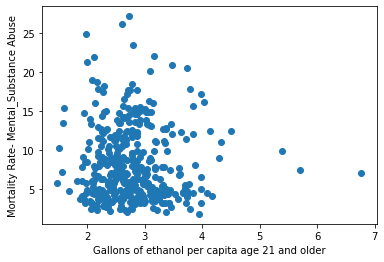

In [40]:
plt.scatter(x_values4,y_values4)
plt.xlabel('Gallons of ethanol per capita age 21 and older')
plt.ylabel('Mortality Rate- Mental_Substance Abuse')

In [33]:
# Calculate correlation

corr4= st.pearsonr(x_values4,y_values4)
corr1= st.pearsonr(x_values1,y_values1)
corr2= st.pearsonr(x_values2,y_values2)
corr3= st.pearsonr(x_values3,y_values3)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values4, y_values4)
regress_values4 = x_values4 * slope + intercept
line_eq2 = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,2))




print(f"The correlation between ethanol consumption and mortality rate for all beverages is {corr4}")
print(f"The correlation between ethanol consumption and mortality rate for spirits is {corr1}")
print(f"The correlation between ethanol consumption and mortality rate for wine is {corr2}")
print(f"The correlation between ethanol consumption and mortality rate for beer is {corr3}")

The correlation between ethanol consumption and mortality rate for all beverages is (-0.023950589474543357, 0.6363908597552489)
The correlation between ethanol consumption and mortality rate for spirits is (-0.003244919390800627, 0.9489374793885837)
The correlation between ethanol consumption and mortality rate for wine is (0.25324222265442853, 3.754778276611352e-07)
The correlation between ethanol consumption and mortality rate for beer is (-0.21460591458903333, 1.8237459001366888e-05)


Text(0, 0.5, 'Mortality Rate')

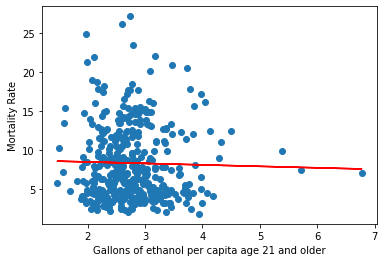

In [34]:
plt.scatter(x_values4,y_values4)
plt.plot(x_values4,regress_values4,"r-")
plt.annotate(line_eq2,(.6,25),fontsize=12,color="red")
plt.xlabel('Gallons of ethanol per capita age 21 and older')
plt.ylabel('Mortality Rate')

In [35]:
# Outliers

df_concat_mental4_1980 = df_concat_mental4.loc[df_concat_mental4['Year'] == 1980]
df_concat_mental4_1985 = df_concat_mental4.loc[df_concat_mental4['Year'] == 1985]
df_concat_mental4_1990 = df_concat_mental4.loc[df_concat_mental4['Year'] == 1990]
df_concat_mental4_1995 = df_concat_mental4.loc[df_concat_mental4['Year'] == 1995]
df_concat_mental4_2000 = df_concat_mental4.loc[df_concat_mental4['Year'] == 2000]
df_concat_mental4_2005 = df_concat_mental4.loc[df_concat_mental4['Year'] == 2005]
df_concat_mental4_2010 = df_concat_mental4.loc[df_concat_mental4['Year'] == 2010]
df_concat_mental4_2014 = df_concat_mental4.loc[df_concat_mental4['Year'] == 2014]

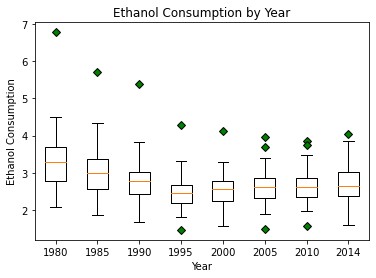

In [36]:
data_by_year4 = [df_concat_mental4_1980['Gallons of ethanol per capita age 21 and older'], 
                df_concat_mental4_1985['Gallons of ethanol per capita age 21 and older'],
                df_concat_mental4_1990['Gallons of ethanol per capita age 21 and older'],
                df_concat_mental4_1995['Gallons of ethanol per capita age 21 and older'],
                df_concat_mental4_2000['Gallons of ethanol per capita age 21 and older'],
                df_concat_mental4_2005['Gallons of ethanol per capita age 21 and older'],
                df_concat_mental4_2010['Gallons of ethanol per capita age 21 and older'],
                df_concat_mental4_2014['Gallons of ethanol per capita age 21 and older']]

year_labels = ['1980','1985','1990','1995','2000','2005','2010','2014']

# Format outlier marker
green_format = dict(markerfacecolor='g', marker='D')

# Plot the data
fig, ax = plt.subplots()
ax.set_title('Ethanol Consumption by Year')
ax.set_ylabel('Ethanol Consumption')
ax.set_xlabel('Year')
ax.boxplot(data_by_year4, flierprops=green_format, labels=year_labels)

plt.show()

In [37]:
year_labels = ['1980','1985','1990','1995','2000','2005','2010','2014']


# Create empty list to fill with tumor vol data (for plotting)
ethanol_list4 = []
outliers_list4 = []


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for year in year_labels:
    
    # Locate the rows for each year
    
    ethanol_consumption = df_concat_mental4.loc[(df_concat_mental4['Year'] == year)]
    ethanol_consumption = df_concat_mental4.iloc[:,3]

    
    # Get upper and lower bounds

    quartiles = ethanol_consumption.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    # Add subset to ethanol list  and state list
    
    ethanol_consumption = pd.DataFrame(ethanol_consumption)
    ethanol_list4.append(ethanol_consumption)    
    
    # Determine outliers using upper and lower bounds
    
    outliers4 = ethanol_consumption.loc[(ethanol_consumption['Gallons of ethanol per capita age 21 and older'] > upper_bound) | (ethanol_consumption['Gallons of ethanol per capita age 21 and older'] < lower_bound)]
    outliers4 = outliers4.squeeze()
    outliers_list4.append(outliers4)    

    # Print results
    
    print(f"{year}'s lower bound is: {lower_bound}.")
    print(f"{year}'s upper bound is: {upper_bound}.")
    print(f"{year}'s potential outliers are: {outliers4}")
    print("---------------------------------------------------")

1980's lower bound is: 1.3665124999999996.
1980's upper bound is: 4.0758125000000005.
1980's potential outliers are: 7      4.4974
115    6.7723
199    4.1758
203    4.0846
211    4.3293
319    5.7109
523    5.3868
727    4.2953
931    4.1366
Name: Gallons of ethanol per capita age 21 and older, dtype: float64
---------------------------------------------------
1985's lower bound is: 1.3665124999999996.
1985's upper bound is: 4.0758125000000005.
1985's potential outliers are: 7      4.4974
115    6.7723
199    4.1758
203    4.0846
211    4.3293
319    5.7109
523    5.3868
727    4.2953
931    4.1366
Name: Gallons of ethanol per capita age 21 and older, dtype: float64
---------------------------------------------------
1990's lower bound is: 1.3665124999999996.
1990's upper bound is: 4.0758125000000005.
1990's potential outliers are: 7      4.4974
115    6.7723
199    4.1758
203    4.0846
211    4.3293
319    5.7109
523    5.3868
727    4.2953
931    4.1366
Name: Gallons of ethanol per 

C:\Users\Walte\.conda\envs\PythonData\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [38]:
# Create a groupby for Year
mental4_year_group = df_concat_mental4.groupby('Year')


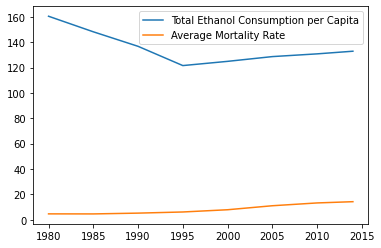

In [39]:
# Plotting line graph
sum_ethanol4 = pd.DataFrame(mental4_year_group["Gallons of ethanol per capita age 21 and older"].sum()).reset_index()
avg_mortality4 = pd.DataFrame(mental4_year_group["Mortality Rate"].mean()).reset_index()


plt.plot(sum_ethanol4['Year'], sum_ethanol4['Gallons of ethanol per capita age 21 and older'], label = "Total Ethanol Consumption per Capita")
plt.plot(avg_mortality4['Year'], avg_mortality4['Mortality Rate'], label = "Average Mortality Rate")
plt.legend()
plt.show()
